# Problemas de prueba de hipótesis

### Metodo Graficos

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from scipy.stats import levene, shapiro, f_oneway
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## Ejercicio 1

Usted es un nutricionista que investiga dos tipos diferentes de dietas para ver si existe una diferencia significativa en la pérdida de peso después de un mes. Eliges dos grupos aleatorios de personas; un grupo sigue la primera dieta y el otro sigue la segunda. Al final del mes, se registra la pérdida de peso (en kg) de cada persona:

| Diet 1 | Diet 2 |
|:-------|:-------|
| 2.0 | 3.0 |
| 2.5 | 3.2 |
| 3.0 | 3.1 |
| 2.8 | 2.9 |
| 2.3 | 2.8 |
| 2.7 | 3.0 |
| 2.5 | 3.2 |

Con estos datos se busca responder a la siguiente pregunta: ¿Existe una diferencia significativa en la pérdida de peso promedio entre las personas que siguieron la primera dieta y las que siguieron la segunda dieta?

Para sacar conclusiones, siga los siguientes puntos:

- Enunciar la hipótesis: hipótesis nula y alternativa.
- Realizar la prueba para comprobar la hipótesis. Puede utilizar la prueba t de Student.
- Analizar las conclusiones.

### Crear dataframe a analizar

In [2]:
dieta1 = [2.0, 2.5, 3.0, 2.8, 2.3, 2.7, 2.5]
dieta2 = [3.0, 3.2, 3.1, 2.9, 2.8, 3.0, 3.2]
df_dietas = pd.DataFrame({
    'peso': dieta1 + dieta2,
    'grupo': ['Dieta 1']*7 + ['Dieta 2']*7
})

### H_0 = No existe diferencia entre los resultados de perdida de peso entre D1 y D2
### H_1 = Existe diferencia significativa entre los resultados de perdida de peso entre D1 y D2

### Graficamos con boxplot para visualizar diferencia

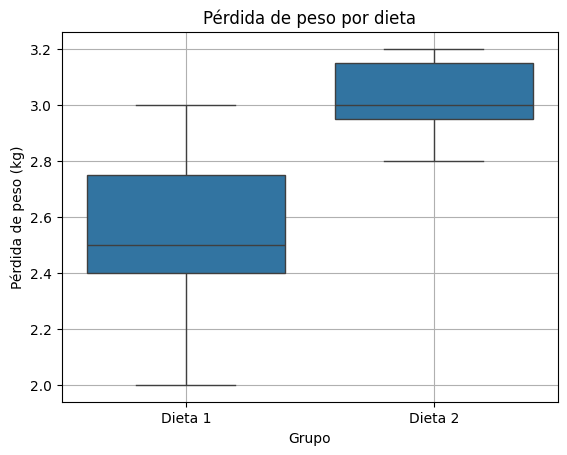

In [3]:
sns.boxplot(x='grupo', y='peso', data=df_dietas)
plt.title('Pérdida de peso por dieta')
plt.ylabel('Pérdida de peso (kg)')
plt.xlabel('Grupo')
plt.grid(True)
plt.show()

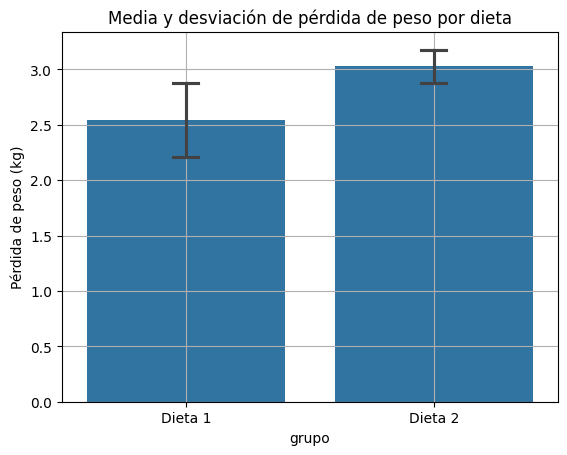

In [4]:
sns.barplot(x='grupo', y='peso', data=df_dietas, errorbar='sd', capsize=0.1)
plt.title('Media y desviación de pérdida de peso por dieta')
plt.ylabel('Pérdida de peso (kg)')
plt.grid(True)
plt.show()

### Prueba t usando librería: statsmodels

In [5]:
t_stat, p_value = stats.ttest_ind(dieta1, dieta2)
print(f"t = {t_stat:.4f}, p = {p_value:.4f}")

t = -3.5383, p = 0.0041


### Conclusiones:
### Dieta 2 produce mayor perdida de peso. 
### Los resultados de perdida de peso son diferentes
### H_0 rechazado y H_1 muy probable

## Ejercicio 2

## INTRO ANOVA

**ANOVA** (*Analysis of Variance - Análisis de variación*) Es una técnica estadística utilizada para comparar las medidas de dos o más grupos. La idea detrás de ANOVA es descomponer la variabilidad total de los datos en dos componentes: variabilidad entre grupos y variabilidad dentro de los grupos:

- **Variabilidad entre grupos**: Esta variabilidad se refiere a las diferencias entre las medias del grupo. Si esta variabilidad es considerablemente mayor que la variabilidad dentro del grupo, podría ser una indicación de que al menos una de las medias del grupo es diferente.
- **Variabilidad dentro del grupo**: Esta variabilidad se refiere a la dispersión de los datos dentro de cada grupo. Si todos los grupos tienen una variabilidad similar, entonces cualquier diferencia notable en las medias de los grupos podría considerarse significativa.

Las hipótesis en ANOVA suelen incluir:

- **Hipótesis nula** ($H₀$): Las medias de todos los grupos son iguales.
- **Hipótesis alternativa** ($H₁$): Al menos una de las medias del grupo es diferente.

Si el resultado de la prueba ANOVA es significativo (por ejemplo, un valor p inferior a un umbral como 0,05), esto sugiere que al menos la media de un grupo es diferente.


Un agricultor decide probar tres tipos diferentes de fertilizantes para determinar si alguno es superior en términos de producción de maíz. El agricultor planta maíz en 15 parcelas idénticas y utiliza los tres fertilizantes (5 parcelas para cada tipo). Al final de la temporada mide el rendimiento de maíz (en kg) de cada parcela, con el siguiente resultado:

| Fertilizante 1 | Fertilizante 2 | Fertilizante 3 |
|:-------------|:-------------|:-------------|
| 20 | 22 | 24 |
| 21 | 21 | 23 |
| 20 | 23 | 22 |
| 19 | 22 | 23 |
| 20 | 21 | 24 |

Con estos datos busca responder la siguiente pregunta: ¿Existe una diferencia significativa en el rendimiento promedio del maíz entre los tres tipos de fertilizantes?

Para ayudarte, sigue los siguientes puntos:

- Enunciar la hipótesis: hipótesis nula y alternativa.
- Realizar la prueba ANOVA.
- Analizar las conclusiones.
- Si un fertilizante es mejor que otro, ¿cómo podemos saberlo?

### Crear dataframe

### H_0 = Los 3 fertilizantes dan un rendimiento en kg similar.
### H_1 = Al menos 1 de los 3 fertilizantes no da un rendimiento en kg similar a los otros 2.

In [6]:
fert1 = [20, 21, 20, 19, 20]
fert2 = [22, 21, 23, 22, 21]
fert3 = [24, 23, 22, 23, 24]
df_fert = pd.DataFrame({
    'rendimiento': fert1 + fert2 + fert3,
    'fertilizante': ['Fert1']*5 + ['Fert2']*5 + ['Fert3']*5
})

### Graficamos

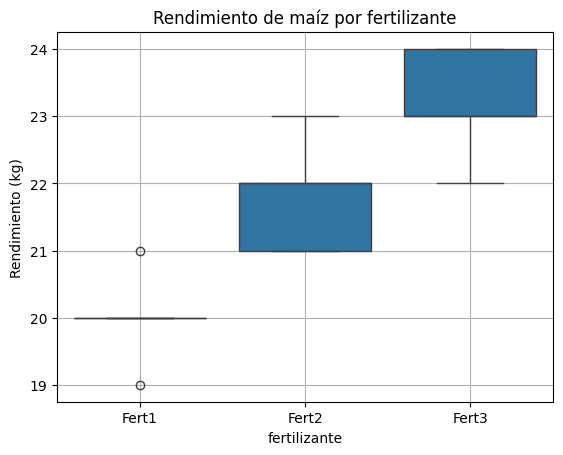

In [7]:
sns.boxplot(x='fertilizante', y='rendimiento', data=df_fert)
plt.title('Rendimiento de maíz por fertilizante')
plt.ylabel('Rendimiento (kg)')
plt.grid(True)
plt.show()

### Visualmente podemos deterinar que los rendimeintos son diferentes. Vamos a comprobarlo con código.

#### Test Levene para comprobar igualdad de las varianzas de los 3 grupos.

In [8]:
stat_levene, p_levene = levene(fert1, fert2, fert3)
print(f"Prueba de Levene: estadístico = {stat_levene:.4f}, p = {p_levene:.4f}")

Prueba de Levene: estadístico = 0.2222, p = 0.8040


#### Condicion Levene > 0.05 exitosa procedemos con Test Shapiro

In [9]:
stat1, p1 = shapiro(fert1)
stat2, p2 = shapiro(fert2)
stat3, p3 = shapiro(fert3)
p1, p2, p3

(np.float64(0.32542950716414576),
 np.float64(0.3140395561440371),
 np.float64(0.3140395561440371))

#### Test Shapiro-Wilk > 0.05. 
#### Distribuciones normales, procedemos con ANOVA

In [10]:
stat_anova, p_anova = f_oneway(fert1, fert2, fert3)
p_anova

np.float64(0.00014047824793190472)

### Conclusiones:
#### H_0 Rechazada ya que los 3 fertilizantes no dan un rendimiento similar.
#### P_ANOVA < 0.05. Inferimos que el rendimeinto de al menos 1 fertilizante es significativamente diferente. (Fert 3)

#### Para identificar cual fertilizante es el mejor:

In [11]:
tukey = pairwise_tukeyhsd(endog=df_fert['rendimiento'], groups=df_fert['fertilizante'], alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
 Fert1  Fert2      1.8 0.0099 0.4572 3.1428   True
 Fert1  Fert3      3.2 0.0001 1.8572 4.5428   True
 Fert2  Fert3      1.4 0.0409 0.0572 2.7428   True
--------------------------------------------------


### Observamos en la columna meandiff que la diferencia entre las medias de los grupos es significativa y lo confirmamos con los valores P ajustados.

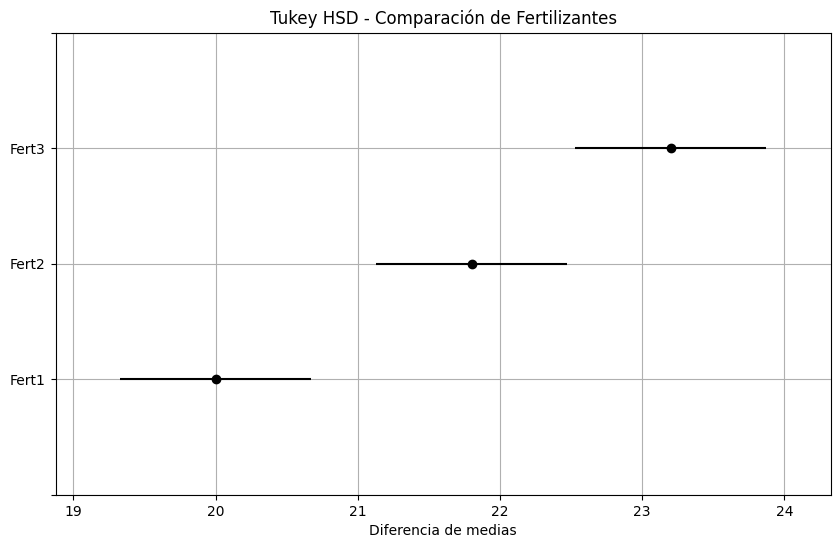

In [12]:
tukey.plot_simultaneous()
plt.title('Tukey HSD - Comparación de Fertilizantes')
plt.xlabel('Diferencia de medias')
plt.grid(True)
plt.show()

## Nuevamente, confirmamos el rechazo de la hipótesis. Específicamente comparando las diferencias de los P contrastadas grupo a grupo.